## LetsGrowMore Virtual Internship Program

### ----------August 2021--------Data Science-----------------

### Name: Sayantan Bhattacharyya

### 1.1 Importing the required modules

In [1]:
import tensorflow
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

### 1.2 Loading the dataset

In [2]:
mnist = tensorflow.keras.datasets.mnist

### 1.3 Dividing our data into train set and test set

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 1.4 Analyzing the train set

In [4]:
x_train.shape

(60000, 28, 28)

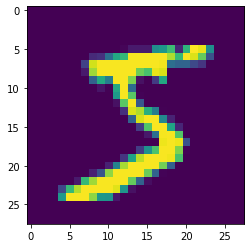

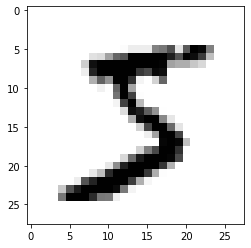

In [5]:
#ploting the first element of train set
plt.imshow(x_train[0])
plt.show()
#plotting the binary image of the same
plt.imshow(x_train[0], cmap = plt.cm.binary)

### 1.5 Pre-processing the data

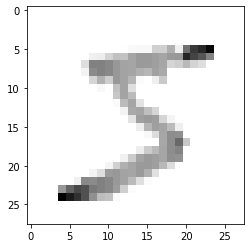

In [6]:
x_train = tensorflow.keras.utils.normalize(x_train, axis= 1)
x_test = tensorflow.keras.utils.normalize(x_test, axis= 1)
# After normalizing
#plotting the binary image of the first element of train set
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [7]:
#increasing one dimension for filter operation
x_train = np.array(x_train).reshape(-1, 28, 28, 1)
#increasing one dimension for filter operation
x_test = np.array(x_test).reshape(-1, 28, 28, 1)
print("Train set dimension :", x_train.shape)
print("Test set dimension :", x_test.shape)

Train set dimension : (60000, 28, 28, 1)
Test set dimension : (10000, 28, 28, 1)


### 1.6 Creating the CNN model

In [8]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#1st Fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#2nd Fully connected layer
model.add(Dense(32))
model.add(Activation('relu'))

#Final Fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [10]:
len(x_train)

60000

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics= ['accuracy'])

In [12]:
len(x_train)

60000

In [13]:
model.fit(x_train, y_train,epochs=5, validation_split = 0.3, batch_size = 1)

Epoch 1/5
42000/42000 [==============================] - 149s 3ms/step - loss: 0.2407 - accuracy: 0.9264 - val_loss: 0.1526 - val_accuracy: 0.9589
Epoch 2/5
42000/42000 [==============================] - 155s 4ms/step - loss: 0.1208 - accuracy: 0.9684 - val_loss: 0.1142 - val_accuracy: 0.9708
Epoch 3/5
42000/42000 [==============================] - 168s 4ms/step - loss: 0.1087 - accuracy: 0.9721 - val_loss: 0.1126 - val_accuracy: 0.9703
Epoch 4/5
42000/42000 [==============================] - 150s 4ms/step - loss: 0.1031 - accuracy: 0.9753 - val_loss: 0.1272 - val_accuracy: 0.9759
Epoch 5/5
42000/42000 [==============================] - 149s 4ms/step - loss: 0.1057 - accuracy: 0.9746 - val_loss: 0.2374 - val_accuracy: 0.9320


### 1.7 Evaluating the model

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy on samples:", test_acc)
print("Test accuracy on samples", test_loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.2454 - accuracy: 0.9315
Test accuracy on samples: 0.9315000176429749
Test accuracy on samples 0.24541926383972168


### 1.8 Testing with custom image

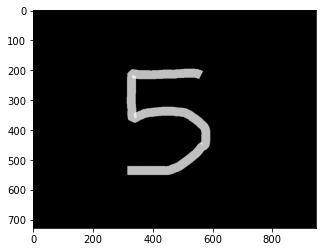

In [15]:
img = cv2.imread('img4.png')
plt.imshow(img)

In [16]:
img.shape

(728, 945, 3)

In [17]:
img = cv2.resize((cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)), (28,28), interpolation=cv2.INTER_AREA)

In [18]:
img.shape

(28, 28)

In [19]:
img = tensorflow.keras.utils.normalize(img, axis= 1)

In [20]:
img = np.array(img).reshape(-1, 28, 28, 1)

In [21]:
img.shape

(1, 28, 28, 1)

In [22]:
print("Number predicted ==>")
print(np.argmax(model.predict(img)))

Number predicted ==>
5
